In [1]:
import os 
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

import numpy as np
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM # type: ignore
from tensorflow.keras.layers import Dense, Dropout, TimeDistributed # type: ignore
from keras.layers import Input, LSTM, Dense
from keras.models import Model
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from datetime import datetime

In [25]:
#Read the csv file
prices_df = pd.read_csv('prices/AGIX-USD.csv')
trends_df = pd.read_csv('trends/singularitynet.csv')

In [26]:
def create_df(trends_df, prices_df):
    # Clean trends_df
    trends_df.reset_index(drop=False, inplace=True)
    trends_df.columns = trends_df.iloc[0]
    trends_df = trends_df[1:][:]
    trends_df.columns = ['Week', 'Trends']

    # Create 'Trends' column in prices_df
    prices_df['Trends'] = 0
    # Convert 'Date' into datetime
    prices_df['Date'] = pd.to_datetime(prices_df['Date'])
    trends_df['Week'] = pd.to_datetime(trends_df['Week'])

    # Look for the latest start date
    start_date = trends_df['Week'].iloc[0]
    if(prices_df['Date'].iloc[0] > trends_df['Week'].iloc[0]):
        start_date = prices_df['Week'].iloc[0]
    prices_df = prices_df[prices_df['Date']>=start_date]

    # Interpolate Trends
    days = len(prices_df)
    weeks = days//7
    modulo = days % 7 

    prices_df.reset_index(inplace=True, drop=True)
    trends_df.reset_index(inplace=True, drop=True)

    for i in range(0, weeks):
        for j in range(0,7):
            prices_df.loc[i*7+j, 'Trends'] = int(trends_df.loc[i, 'Trends'])
    for k in range(weeks*7, days):
        prices_df.loc[k, 'Trends'] = int(trends_df.loc[trends_df.index[-1], 'Trends'])
    
    df = prices_df
    train_dates = pd.to_datetime(prices_df['Date'])
    return df, train_dates

df, train_dates = create_df(trends_df, prices_df)

In [46]:
variable = df.columns[2]
correlation = df[variable].corr(df['Trends'])

print(f"Correlation between '{variable}' and '{df.columns[-1]}': {correlation}")

Correlation between 'High' and 'Trends': 0.7216728483768522


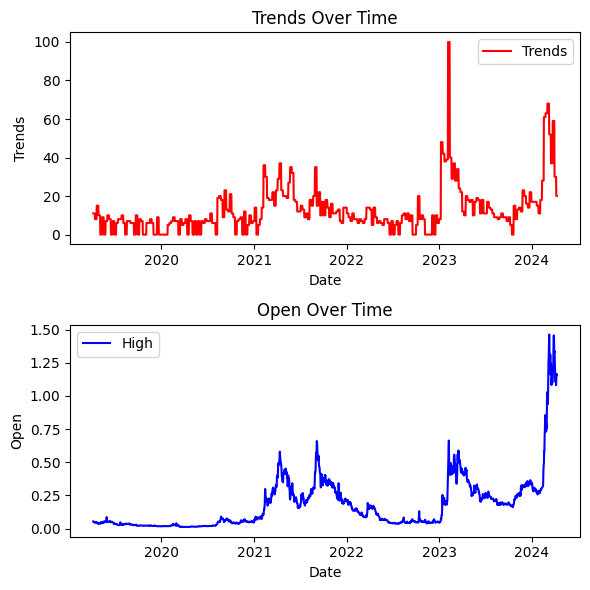

<Figure size 640x480 with 0 Axes>

In [54]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axs = plt.subplots(2, 1, figsize=(6, 6))

# Plot 'Trends' over time
axs[0].plot(train_dates, df['Trends'], label='Trends', color='red')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Trends')
axs[0].set_title('Trends Over Time')
axs[0].legend()

# Plot 'Open' over time
axs[1].plot(train_dates, df[variable], label=f"{variable}", color='blue')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Open')
axs[1].set_title('Open Over Time')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()
plt.savefig('singularitynet.png') 


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


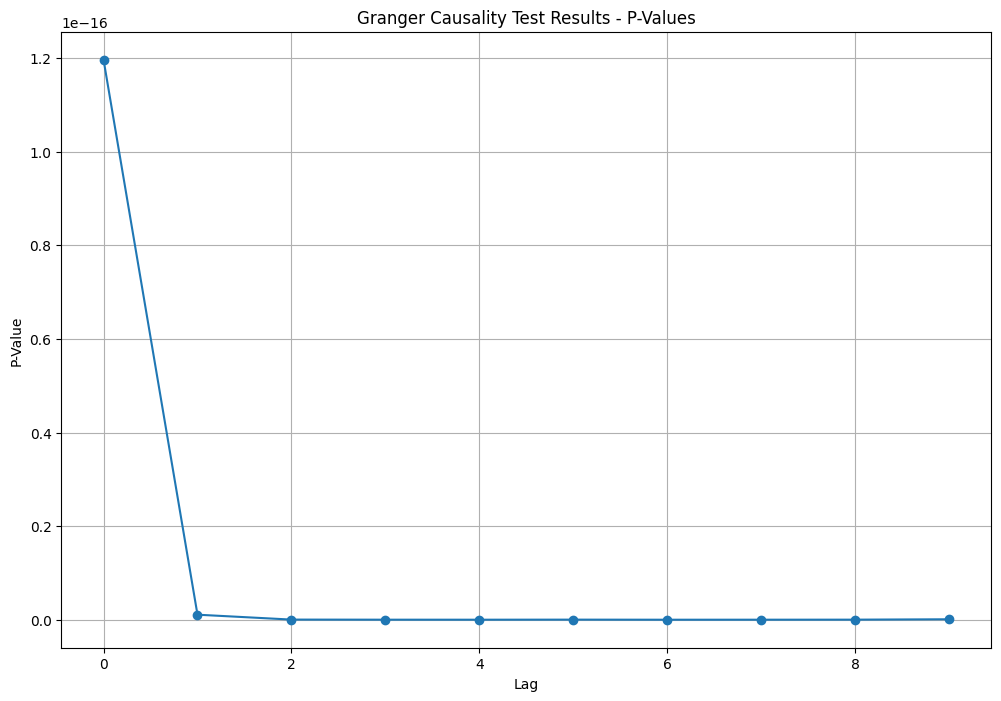

In [51]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and it has been loaded with your data
# Make sure 'Open' and 'Trends' are columns in your DataFrame

# Prepare the data
data = df[['Open', 'Trends']]

# Perform the Granger causality test
test_results = grangercausalitytests(data, maxlag=10, verbose=False)
plt.figure(figsize=(12, 8))
plt.plot([result[0]['ssr_chi2test'][1] for result in test_results.values()], marker='o')
plt.title('Granger Causality Test Results - P-Values')
plt.xlabel('Lag')
plt.ylabel('P-Value')
plt.grid(True)
plt.show()


In [53]:
test_results[1]

({'ssr_ftest': (68.503052246953, 2.414872079521091e-16, 1826.0, 1),
  'ssr_chi2test': (68.61559833498195, 1.1965392332595447e-16, 1),
  'lrtest': (67.35983937345009, 2.262102577716289e-16, 1),
  'params_ftest': (68.50305224695167, 2.4148720795226526e-16, 1826.0, 1.0)},
  array([[0., 1., 0.]])])